# Numeric Feature Selection

The purpose of this notebook is to select numeric features.  I take a similar tact that I used with the numeric features and check if the charge off rate is different for different values of the feature.  However, since these are continuous values I have to do some *bucketing* to make this work.

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Reading-In Data

In [2]:
df_default = pd.read_csv('data_processed/03_categorical_processed.csv', low_memory=False)

## Checking Base-Rates

In [3]:
df_default['charged_off'].mean()

0.20001681322191772

In [4]:
np.sum(df_default['charged_off'] * df_default['loan_amnt'])

1848347600.0

In [5]:
np.sum(df_default['charged_off'] * df_default['loan_amnt']) / np.sum(df_default['loan_amnt'])

0.21578509005280022

## Individual Analysis of Select Numerical Variables

### `int_rate` (keep)

In [6]:
df_default['int_rate'].value_counts()

int_rate
10.99    16702
11.99    14711
13.99    12910
5.32     12604
9.17     11429
         ...  
17.34        1
16.90        1
18.72        1
21.14        1
24.76        1
Name: count, Length: 633, dtype: int64

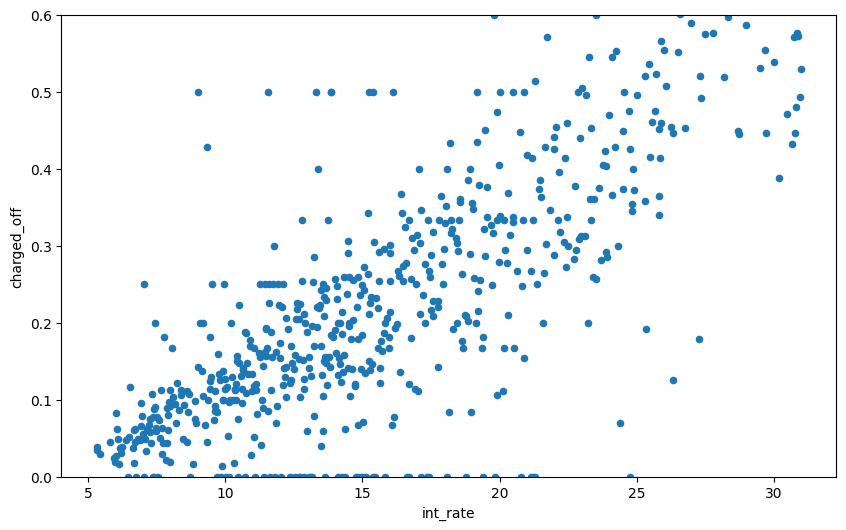

In [17]:
(
df_default.groupby(['int_rate'])['charged_off'].agg(np.mean).to_frame().reset_index()
    .plot(kind='scatter', x='int_rate', y='charged_off', figsize=(10,6), ylim=(0,0.6))
);

### `annual_inc` (keep)

Strong relationship between income and charge_off rate

In [18]:
df_default['annual_inc'].value_counts()

annual_inc
60000.0    23124
50000.0    20071
65000.0    17130
70000.0    16133
40000.0    15743
           ...  
56373.0        1
55372.0        1
64765.0        1
9972.0         1
46123.0        1
Name: count, Length: 36354, dtype: int64

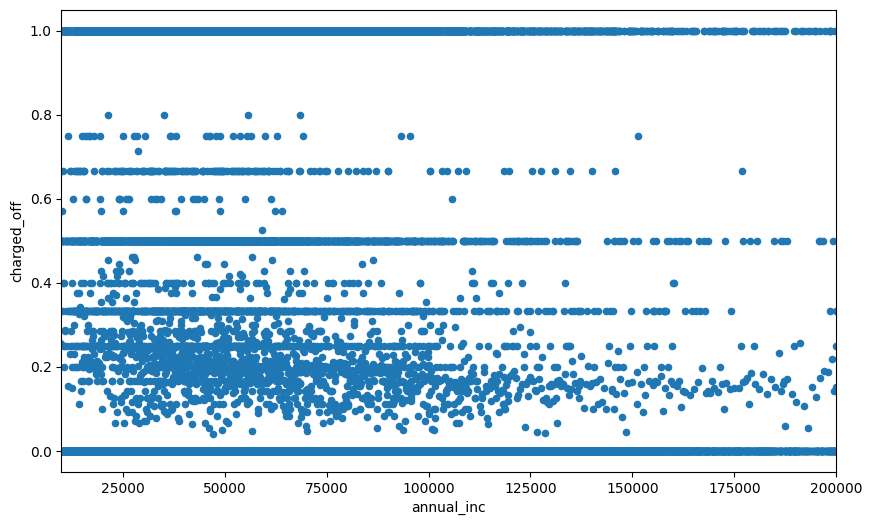

In [19]:
(
df_default.groupby(['annual_inc'])['charged_off'].agg(np.mean).to_frame().reset_index()
    .plot(kind='scatter', x='annual_inc', y='charged_off', figsize=(10,6), xlim=(10000, 200000))
);

In [20]:
df_default.groupby(['annual_inc'])['charged_off'].agg(np.mean)

annual_inc
0.0           0.173913
1.0           0.166667
2.0           0.000000
16.0          0.000000
20.0          1.000000
                ...   
8700000.0     0.000000
9000000.0     0.000000
9500000.0     1.000000
9550000.0     0.000000
10999200.0    0.000000
Name: charged_off, Length: 36354, dtype: float64

In [21]:
income_buckets = list(df_default['annual_inc'].value_counts().to_frame().head(100).index)

<Axes: xlabel='annual_inc', ylabel='charged_off'>

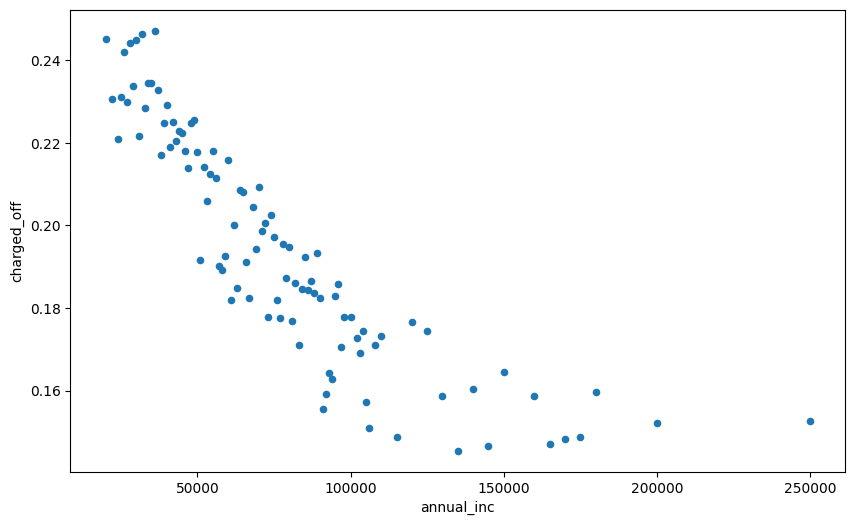

In [22]:
(
df_default.query('annual_inc in @income_buckets').groupby(['annual_inc'])['charged_off'].agg(np.mean).to_frame().reset_index()
    .plot(kind='scatter', x='annual_inc', y='charged_off', figsize=(10,6))
)

### `dti` (keep)

In [23]:
df_default['dti'].value_counts()

dti
18.00     449
19.20     439
16.80     414
14.40     412
15.60     395
         ... 
57.50       1
57.87       1
97.04       1
136.93      1
51.56       1
Name: count, Length: 5875, dtype: int64

In [24]:
dti_buckets = list(df_default['dti'].value_counts().to_frame().head(1000).index)

<Axes: xlabel='dti', ylabel='charged_off'>

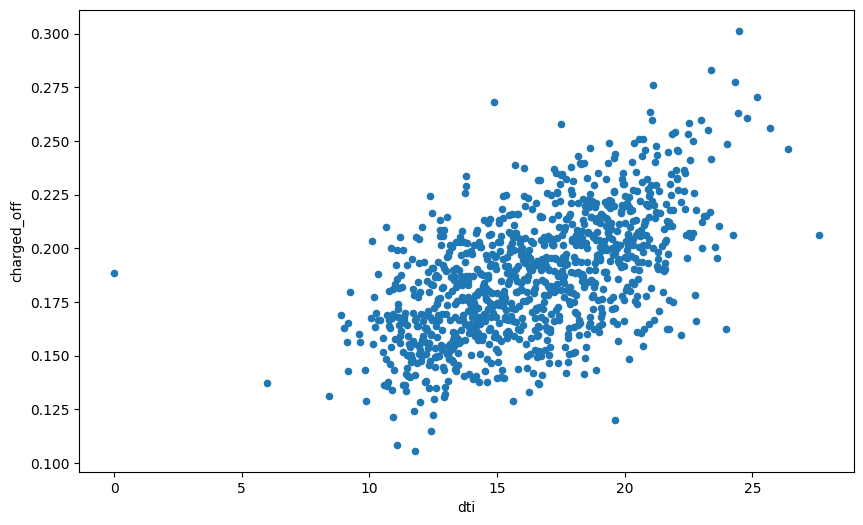

In [25]:
(
df_default.query('dti in @dti_buckets').groupby(['dti'])['charged_off'].agg(np.mean).to_frame().reset_index()
    .plot(kind='scatter', x='dti', y='charged_off', figsize=(10,6))
)

### `revol_util` (keep)

In [26]:
df_default['revol_util'].value_counts().sort_index()

revol_util
0.00      3217
0.03         1
0.05         1
0.10       416
0.12         1
          ... 
177.70       1
184.60       1
193.00       1
366.60       1
892.30       1
Name: count, Length: 1227, dtype: int64

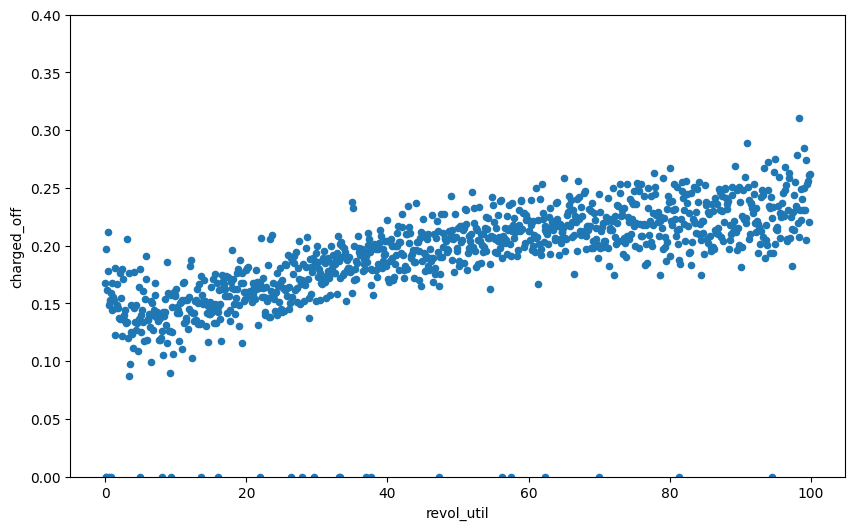

In [27]:
(
df_default.groupby(['revol_util'])['charged_off'].agg(np.mean).to_frame().reset_index().query('revol_util < 100')
    .plot(kind='scatter', x='revol_util', y='charged_off', figsize=(10,6), ylim=(0,0.4))
);

### `tot_cur_bal` (keep)

In [28]:
df_default['tot_cur_bal'].value_counts().sort_index()

tot_cur_bal
0.0          170
1.0            3
2.0            5
3.0            3
5.0            3
            ... 
3881449.0      1
4151547.0      1
4447397.0      1
4535114.0      1
8000078.0      1
Name: count, Length: 272747, dtype: int64

In [29]:
bins = pd.cut(df_default['tot_cur_bal'], [-1, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 10000000])
df_default.groupby(bins)['tot_cur_bal'].agg('count')

tot_cur_bal
(-1, 50000]           223566
(50000, 100000]        84055
(100000, 150000]       53687
(150000, 200000]       52855
(200000, 250000]       42837
(250000, 300000]       32276
(300000, 400000]       39095
(400000, 500000]       19117
(500000, 10000000]     17280
Name: tot_cur_bal, dtype: int64

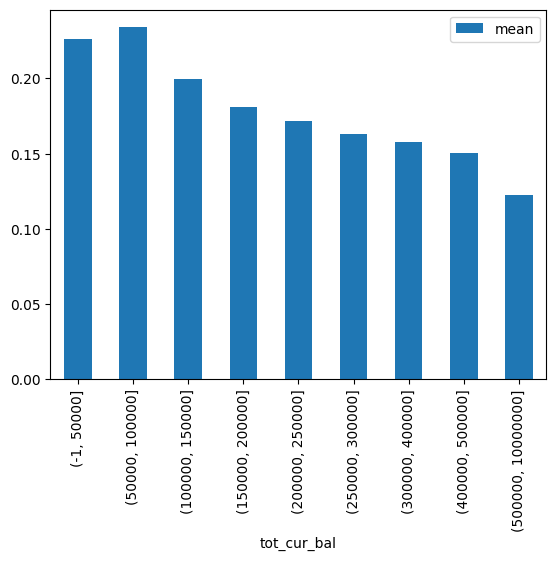

In [30]:
df_default.groupby(bins)['charged_off'].agg([np.mean]).reset_index().plot(kind='bar', x='tot_cur_bal', y='mean');

### `last_fico_range_high` (keep)

In [37]:
df_default["last_fico_range_high"].sort_values().value_counts()

last_fico_range_high
709.0    19160
694.0    18900
699.0    18749
704.0    18623
719.0    18339
         ...  
834.0      938
839.0      413
844.0      249
850.0      126
0.0         99
Name: count, Length: 72, dtype: int64

<Axes: xlabel='last_fico_range_high'>

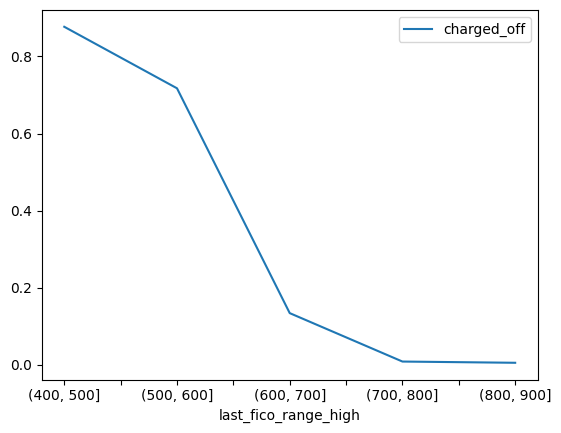

In [40]:
bins = pd.cut(df_default["last_fico_range_high"], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

(
df_default
#.groupby(["last_fico_range_high"])[["charged_off"]].mean()
.groupby(bins)[["charged_off"]].mean()
.reset_index()
.plot(x="last_fico_range_high", y="charged_off")
)

### `last_fico_range_low` (keep)

In [41]:
df_default["last_fico_range_low"].sort_values().value_counts()

last_fico_range_low
705.0    19160
690.0    18900
695.0    18749
700.0    18623
715.0    18339
         ...  
825.0     1556
830.0      938
835.0      413
840.0      249
845.0      126
Name: count, Length: 71, dtype: int64

<Axes: xlabel='last_fico_range_low'>

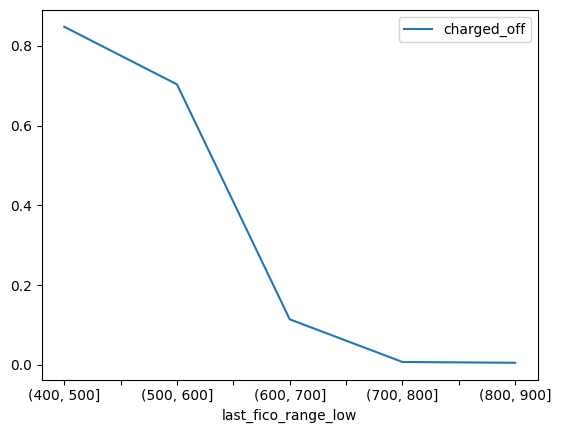

In [43]:
bins = pd.cut(df_default["last_fico_range_low"], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

(
df_default
#.groupby(["last_fico_range_high"])[["charged_off"]].mean()
.groupby(bins)[["charged_off"]].mean()
.reset_index()
.plot(x="last_fico_range_low", y="charged_off")
)

### `fico_range_low` (keep)

In [44]:
df_default["fico_range_low"].sort_values().value_counts()

fico_range_low
660.0    53502
670.0    51737
665.0    51463
675.0    46064
680.0    45575
685.0    40278
690.0    39104
695.0    34833
700.0    32105
705.0    29021
710.0    25459
715.0    22427
720.0    19304
725.0    15665
730.0    13496
735.0    10602
740.0     9597
745.0     7622
750.0     6991
755.0     6038
760.0     4978
765.0     4583
770.0     3897
775.0     3543
780.0     3245
785.0     2558
790.0     2359
795.0     1898
800.0     1724
805.0     1506
810.0     1013
815.0      823
820.0      624
825.0      457
830.0      316
835.0      174
840.0      109
845.0       80
Name: count, dtype: int64

<Axes: xlabel='fico_range_low'>

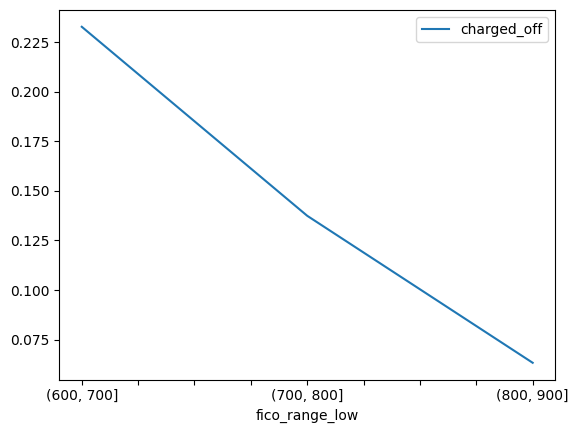

In [46]:
bins = pd.cut(df_default["fico_range_low"], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

(
df_default
.groupby(bins)[["charged_off"]].mean()
.reset_index()
.plot(x="fico_range_low", y="charged_off")
)